In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from collections import defaultdict

In [2]:
optimal_scores = defaultdict(lambda : defaultdict())
optimal_actions = defaultdict(lambda : defaultdict())

In [3]:
n =0
c =0
for theta_hat in range(6):
    print(theta_hat)
    df = pd.read_csv(f"experiment_data/bmps_posterior_csvs/newout{theta_hat}.csv")
    for index, row in df.iterrows():
        c += 1
        ground_truth = ast.literal_eval(row['groundtruth'])
        optimal_scores[theta_hat][frozenset(ground_truth)] = row['return']
        actions = ast.literal_eval(row['action'])
        optimal_actions[theta_hat][ground_truth] = actions
        n+= len(actions)-1
print(n/c)
mean_clicks = n/c

0
1
2
3
4
5
5.342989522895187


In [113]:
trials = pd.read_csv("experiment_data/sum.csv")

In [114]:
trials['wid'] = [x.split(":")[0] for x in trials.id]

In [115]:
endremove = ['A1N4P4XGQM7NXE', 'A1URCANKSOR247', 'A34RZW1GGCZ2L6', 'ADF5F7Z0SP0B3', 'A1U1PWOUK690TU','A188QD7PP2FO7D','AO988J3346ETB', 'ACMCJFX5P8UGL', 'A32OHDY4GTJ51H','A2UHF7UL7G0Y78','A2SRFXB3O542HW', 'ACMCJFX5P8UGL', 'AY10TBUJPFTY6', 'A2N9PODZK37GCF', 'A3GIR260B6Q8GS', 'A15CL9A9FVSJDW', 'A2JJF5OFND2KL5', 'A1D4QB5UOS8PHW', 'A38PJ344YGWQ61', 'A37XVDGVAEI7F', 'A3FXVNZ5VG98IP', 'A3J9ORWWVZCEOI', 'A9WFXKAF1RF5Q', 'A1A9402JQBA2AF', 'A3P57IUDHUKNCE', 'A34RZW1GGCZ2L6', 'A1TI5K7PKFIB50', 'ADF5F7Z0SP0B3', 'A61WPWSYJG6DJ', 'A77K8W55MJEKX', 'A1OIIHLOC90XCH', 'A318574M8Q965P', 'A372RONRIOLZM4', 'A5Y5D3XPOQCR6', 'A2EMVL9KAQZ54T', 'A39EH9228GV09X', 'A1SWGSFIMZJQE', 'A171S8E9IFSHH2', 'A188QD7PP2FO7D', 'AYTUV0V3IO5AK', 'A33UW3XW0LM27W', 'A18JZJJYW6MCBH', 'A3N5TBI76IVJFA', 'A3NN2AK1DFDNDU', 'A265I4XVBXVLXB', 'AO988J3346ETB', 'A32OHDY4GTJ51H', 'A305USYDAJUGI7', 'A3CIHH2K57SVR0', 'A2Q45U44DLMPI4', 'A80X2FTFDSR19', 'A1URCANKSOR247', 'A8U36CWL6V8K6', 'AKBJ0ZWRYJH16', 'A2UHF7UL7G0Y78', 'A2Y2ZIFWWTF64J', 'A2JV461I3AIXOH', 'A3PRFA3M7OSCT5', 'A3HZIPKSCYU7ZI', 'A3NV19LE2NW6YD', 'AXZV4UH3U7A6V', 'A1J1PWS99LFVPL']

In [116]:
trials = trials[~trials.wid.isin(endremove)]

In [117]:
print(len(trials))

246


In [118]:
conds = trials.condition
scores = trials.score
norm_scores = trials.norm_score

In [119]:
trials = trials[['wid', 'condition', 'score', 'norm_score']]
display(trials)

,wid,condition,score,norm_score
0,A339YQ2DS0BS8R,2,757,-153
1,AG3CT73HF2L2B,1,627,-22
2,A37XA1JSSYORAZ,2,645,-193
3,A32PMXX4P67Z56,1,454,-435
4,A1RK0C8N3ABXFY,0,715,-39
...,...,...,...,...
292,A22G3IFRURGMBT,0,637,-28
293,A12000QAJWCVBX,1,296,-589
294,AQ3HYOMBERB6D,1,123,-542
296,A3MPQHRJ7KMSAV,2,788,-80


### Considering only required pids

In [120]:
def cohend(l1, l2):
    pooled_std = np.sqrt(((np.std(l1)**2) + np.std(l2)**2)/2)
    return (np.mean(l1) - np.mean(l2))/pooled_std

In [121]:
pids = trials.wid.tolist()

In [122]:
data_terms = ["second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "final"]
hitids = ["3AXFSPQOYQ5CQXD09O6ASMAJ4ULFJ0", "3X878VYTIEPJ62CY8FHDPW5AE2XF7C","3TZDZ3Y0JSDWU66JGD0CEQSM8J919I", "3Z56AA6EK4768CQABSGYE8PNGT66MU", "3KTZHH2ONIMTCQ9Y47DWYMLEMPH8M5", "3AQN9REUTFN5N2U34ICNE9MM6SUDYC", "3B286OTISEOHU6WSY8KIELZS8L5JA3", "3HY86PZXPYPDP2X0OOGY64TXZJ51EE"]
i = 7
hitid = hitids[i]

In [123]:
df = pd.read_csv(f"experiment_data/rsd_{data_terms[i]}_trials.csv")

In [124]:
df = df[df.hitid == hitid]
df = df[df.status == 5]

In [125]:
df = df[df.workerid.isin(pids)]

In [126]:
datastrings = df.datastring.tolist()

In [127]:
datastrings = df.datastring.tolist()
datastrings = [json.loads(d) for d in datastrings]

In [128]:
#excluded_indices = [9, 22, 24, 34, 39, 41, 43, 44]
excluded_indices = []

In [129]:
bonuses = [d['questiondata']['final_bonus'] for i, d in enumerate(datastrings) if i not in excluded_indices]
conds = [d['questiondata']['condition'] for i, d in enumerate(datastrings) if i not in excluded_indices]
starts = [d['questiondata']['start_time'] for i, d in enumerate(datastrings) if i not in excluded_indices]
ends = [d['questiondata']['end_time'] for i, d in enumerate(datastrings) if i not in excluded_indices]

In [130]:
from collections import defaultdict
trial_scores = []
pid_survey_texts = []
participant_data = defaultdict(lambda : defaultdict())
pid_trial_actions = []
pid_envs = []
pid_demo_correct = []
pid_thetas = []
pid_theta_hats = []
for i, d in enumerate(datastrings):
    stimulus_count = 0
    if i not in excluded_indices:
        scores = []
        survey_texts = []
        trials_actions = []
        envs = []
        participant_data[i]['bonus'] = d['questiondata']['final_bonus']
        participant_data[i]['start_time'] = d['questiondata']['start_time']
        participant_data[i]['end_time'] = d['questiondata']['end_time']
        participant_data[i]['condition'] = d['questiondata']['condition']
        pid_thetas.append(d['questiondata']['random_theta_condition'])
        pid_theta_hats.append(d['questiondata']['theta_hat_condition'])
        condition = d['questiondata']['condition']
        if condition == 0:
            pid_demo_correct.append(0)
        dat = d["data"]
        for k in dat:
            z = k["trialdata"]
            if "stimulus" in z and "correct" in z:
                if z["correct"][0]:
                    pid_demo_correct.append(1)
                else:
                    pid_demo_correct.append(0)
            if "block" in z:
                if z["block"] == "demo_main2":
                    stimulus_count += 1
            if z['trial_type'] == 'survey-text':
                survey_texts.append(z)
            if "block" in z:
                if z["block"] == "test_main":
                    actions = [int(q) for q in z["queries"]["click"]["state"]["target"]] + [0]
                    envs.append([0] + [int(e) for e in z["stateRewards"][1:]])
                    s = z['score']
#                     if len(actions) == 1:
#                         s = 0
                    scores.append(s)
                    trials_actions.append(actions)
            #print(k['trialdata'])
        #print(conds[i], stimulus_count)
        pid_trial_actions.append(trials_actions)
        pid_envs.append(envs)
        participant_data[i]['scores'] = scores
        participant_data[i]['survey_texts'] = survey_texts
        trial_scores.append(scores)
        pid_survey_texts.append(survey_texts)

In [131]:
ctc = defaultdict(list)
for c,t in zip(conds, trial_scores):
    ctc[c].append(t)
for c in ctc.keys():
    ctc[c] = np.array(ctc[c])

In [132]:
mean_rewards = defaultdict(list)
print(len(conds), len(trial_scores))
for c, test_r in zip(conds, trial_scores):
    mean_rewards[c].append(np.mean(test_r))
print(dict(mean_rewards))

246 246
{2: [50.46666666666667, 43.0, 40.86666666666667, 43.4, 36.333333333333336, 46.266666666666666, 52.266666666666666, 45.6, 56.06666666666667, 42.4, 44.93333333333333, 34.4, 35.666666666666664, 34.333333333333336, 38.266666666666666, 41.93333333333333, 33.06666666666667, 45.4, 47.733333333333334, 57.266666666666666, 46.266666666666666, 38.333333333333336, 23.8, 7.666666666666667, 60.0, 47.4, 42.0, 36.46666666666667, 44.733333333333334, 40.46666666666667, 34.0, 59.333333333333336, 6.866666666666666, 31.333333333333332, 30.0, 6.133333333333334, 47.6, 38.13333333333333, 56.13333333333333, 60.13333333333333, 55.86666666666667, 37.13333333333333, 32.0, 23.933333333333334, 44.6, 49.13333333333333, 59.06666666666667, 42.53333333333333, 32.4, 45.8, 36.8, 45.733333333333334, 30.866666666666667, 37.6, 34.6, 62.86666666666667, -4.333333333333333, 27.266666666666666, 31.2, 46.46666666666667, 33.46666666666667, 42.333333333333336, 58.8, 20.066666666666666, -1.0666666666666667, 47.4, 59.9333333

In [133]:
def get_se(x):
    return np.std(x)/np.sqrt(len(x))
print(np.std(mean_rewards[0]))
print(get_se(mean_rewards[0]))

17.61780682102518
2.007735421278571


In [134]:
def get_max_return(env):
    max_r = 0
    for i in range(3):
        max_r += max(env[3*i + 1: 3*i+4])
    return max_r

In [135]:
from scipy.stats import ttest_ind
#mean_rewards = [cond0.norm_score.tolist(), cond1.norm_score.tolist(), cond2.norm_score.tolist()]
for i in range(3):
    for j in range(i+1, 3):
        print(f"t-test between condition {i} and condition {j}")
        t, p = ttest_ind(mean_rewards[i], mean_rewards[j])
        print(len(mean_rewards[i]) + len(mean_rewards[j]) - 2)
        print(np.mean(mean_rewards[i]), np.mean(mean_rewards[j]))
        print(np.std(mean_rewards[i]), np.std(mean_rewards[j]))
        print("t =", np.round(t, 3), "p = ", np.round(p, 3))
        print(f"Cohen's d={np.round(cohend(mean_rewards[i], mean_rewards[j]), 3)}")

t-test between condition 0 and condition 1
157
29.877922077922076 32.886178861788615
17.61780682102518 16.065956492771573
t = -1.119 p =  0.265
Cohen's d=-0.178
t-test between condition 0 and condition 2
162
29.877922077922076 39.51264367816093
17.61780682102518 15.116248767180892
t = -3.746 p =  0.0
Cohen's d=-0.587
t-test between condition 1 and condition 2
167
32.886178861788615 39.51264367816093
16.065956492771573 15.116248767180892
t = -2.746 p =  0.007
Cohen's d=-0.425


In [136]:
from scipy.stats import kruskal
F, p = kruskal(mean_rewards[0], mean_rewards[1], mean_rewards[2])
print(f"H-statistic: {np.round(F, 3)}, p-value: {np.round(p, 4)}")

H-statistic: 15.306, p-value: 0.0005


In [137]:
from scipy.stats import f_oneway
F, p = f_oneway(mean_rewards[0], mean_rewards[1], mean_rewards[2])
print(f"F-statistic: {np.round(F, 3)}, p-value: {np.round(p, 4)}")

F-statistic: 7.546, p-value: 0.0007


In [138]:
mean_rewards = defaultdict(list)
mean_mean_rewards = defaultdict(list)
optimal_condition_rewards = defaultdict(list)
diff_p_trial_scores = []
optimal_p_trial_scores = []
reward_trial_scores = []
for theta_hat, envs, sc in zip(pid_theta_hats, pid_envs, trial_scores):
    diff_trial_scores = []
    optimal_trial_scores = []
    t_trial_scores = []
    for env, s in zip(envs, sc):
        optimal_score = get_max_return(env) - mean_clicks
        temp = optimal_score - s
        diff_trial_scores.append(temp)
        optimal_trial_scores.append(optimal_score)
        t_trial_scores.append(s)
    diff_p_trial_scores.append(diff_trial_scores)
    optimal_p_trial_scores.append(optimal_trial_scores)
    reward_trial_scores.append(t_trial_scores)
optimal_rewards = defaultdict(list)

In [139]:
ratio_rewards = defaultdict(list)
score_rewards = defaultdict(list)
for c, test_r, op_r, t_r in zip(conds, diff_p_trial_scores, optimal_p_trial_scores, reward_trial_scores):
    mean_rewards[c].append(np.sum(test_r))
    mean_mean_rewards[c].append(np.mean(test_r))
    optimal_rewards[c].append(np.sum(op_r))
    ratio_rewards[c].append(np.sum(test_r)/np.sum(op_r))
    score_rewards[c].append(np.mean(t_r))

In [140]:
ratio_data = []
condition_map = {0: 'Control \nCondition', 1: 'Non-robust \nTutor', 2: 'Robust\nTutor'}
for condition in range(3):
    for v in ratio_rewards[condition]:
        ratio_data.append([condition_map[condition], 1-v])
ratio_df = pd.DataFrame(ratio_data, columns = ['condition', 'suboptimality'])

In [141]:
total_score_data = []
condition_map = {0: 'Control \nCondition', 1: 'Non-robust \nTutor', 2: 'Robust\nTutor'}
for condition in range(3):
    for v in score_rewards[condition]:
        total_score_data.append([condition_map[condition], v])
sc_df = pd.DataFrame(total_score_data, columns = ['condition', 'score'])

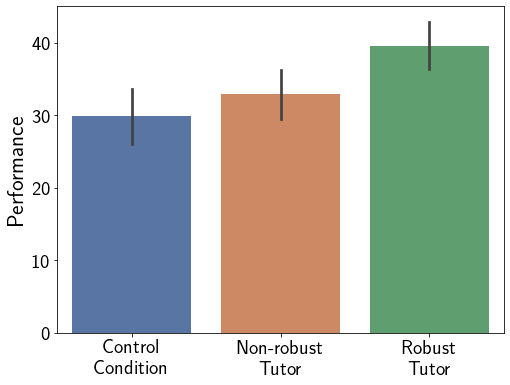

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath']
ax = plt.axes()
sns.set_palette('deep')
sns.barplot(x = 'condition', y=r'score', data=sc_df)
plt.xlabel("", fontsize=24)
plt.ylabel(r"Performance", fontsize=23)
plt.tick_params('both', labelsize=20)
vals = ax.get_yticks()
plt.ylim(top = 45)
# ax.annotate(r'Resource-Rationality Quotient = $\dfrac{RR_{people}}{RR_{h*}}$', xy=(420, 316), xycoords='axes points',
#             size=20, ha='right', va='top',
#             #bbox=dict(boxstyle='round', fc='w')
#            )
# ax.annotate(r'Resource-Rationality Quotient = $\underline{RR_{people}}$', xy=(420, 316), xycoords='axes points',
#             size=20, ha='right', va='top',
#             #bbox=dict(boxstyle='round', fc='w')
#           )
#y_ticks = [str(int(100*x))+"\%" for x in vals]
#ax.set_yticklabels(y_ticks)
plt.savefig("resource-rationality2.png", bbox_inches='tight', dpi=400)

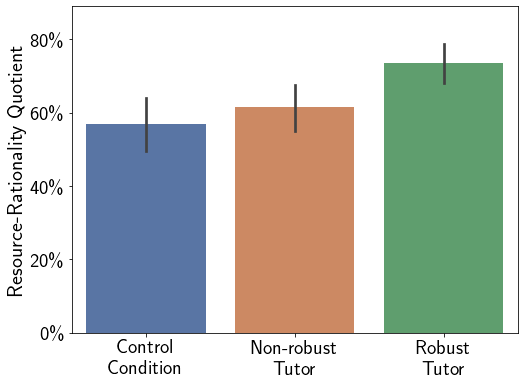

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath']
ax = plt.axes()
sns.set_palette('deep')
sns.barplot(x = 'condition', y=r'suboptimality', data=ratio_df)
plt.xlabel("", fontsize=24)
plt.ylabel(r"Resource-Rationality Quotient", fontsize=21.5)
plt.tick_params('both', labelsize=20)
vals = ax.get_yticks()
plt.ylim(top = 0.89)
# ax.annotate(r'Resource-Rationality Quotient = $\dfrac{RR_{people}}{RR_{h*}}$', xy=(420, 316), xycoords='axes points',
#             size=20, ha='right', va='top',
#             #bbox=dict(boxstyle='round', fc='w')
#            )
# ax.annotate(r'Resource-Rationality Quotient = $\underline{RR_{people}}$', xy=(420, 316), xycoords='axes points',
#             size=20, ha='right', va='top',
#             #bbox=dict(boxstyle='round', fc='w')
#           )
y_ticks = [str(int(100*x))+"\%" for x in vals]
ax.set_yticklabels(y_ticks)
plt.savefig("resource-rationality2.png", bbox_inches='tight', dpi=400)

In [33]:
ratio_df.groupby('condition').mean()

,suboptimality
condition,
Control \nCondition,0.568502
Non-robust \nTutor,0.615228
Robust\nTutor,0.736360


In [34]:
for i in range(3):
    print(f"Condition {i}")
    print("Mean", np.mean(mean_rewards[i]))
    print("STD:",np.round(np.std(mean_rewards[i]), 2), "SE:", np.round(np.std(mean_rewards[i])/np.sqrt(15), 2))

Condition 0
Mean 333.85515715657226
STD: 250.18 SE: 64.6
Condition 1
Mean 309.0136937419381
STD: 235.34 SE: 60.77
Condition 2
Mean 208.48734106461825
STD: 200.15 SE: 51.68


In [35]:
from scipy.stats import f_oneway
F, p = f_oneway(mean_rewards[0], mean_rewards[1], mean_rewards[2])
print(f"F-statistic: {np.round(F, 3)}, p-value: {np.round(p, 4)}")

F-statistic: 6.969, p-value: 0.0011


In [36]:
from scipy.stats import kruskal
F, p = kruskal(mean_rewards[0], mean_rewards[1], mean_rewards[2])
print(f"H-statistic: {np.round(F, 3)}, p-value: {np.round(p, 4)}")

H-statistic: 11.76, p-value: 0.0028


In [37]:
print(len(pid_demo_correct))

246


In [38]:
from collections import Counter
counts = Counter(conds)
print(counts)
cond_correct = defaultdict(int)
for cond, c in zip(conds, pid_demo_correct):
    if c==1:
        cond_correct[cond] += 1
print(cond_correct)

Counter({2: 87, 1: 82, 0: 77})
defaultdict(<class 'int'>, {2: 56, 1: 78})


In [39]:
for c in cond_correct.keys():
    print(c)
    print(cond_correct[c]/counts[c])

2
0.6436781609195402
1
0.9512195121951219


In [40]:
def count_high_variance_nodes(env, actions):
    pos = []
    count = 0
    for i, v in enumerate(env):
        if v in [-48, 48, 24, -24]:
            pos.append(i)
    for a in actions:
        if a in pos:
            count += 1
    if count==3:
        return 1
    else:
        return 0

def chv(envs, a_actions):
    l = []
    total = 0
    for env, actions in zip(envs, a_actions):
        l.append(count_high_variance_nodes(env, actions))
        total += 1
    print(np.sum(l)/total)
    return np.sum(l), total

c_envs = defaultdict(list)
c_actions = defaultdict(list)

for cond, envs, a_actions in zip(conds, pid_envs, pid_trial_actions):
    c_envs[cond] += envs
    c_actions[cond] += a_actions

for cond in range(3):
    print(chv(c_envs[cond], c_actions[cond]))

0.4666666666666667
(539, 1155)
0.41300813008130083
(508, 1230)
0.6199233716475095
(809, 1305)


In [41]:
from statsmodels.stats.proportion import proportions_chisquare
res = proportions_chisquare([539, 508, 809], [1155, 1230, 1305])
print(res)

(117.31088894925679, 3.3594186669477334e-26, (array([[539, 616],
       [508, 722],
       [809, 496]]), array([[580.94308943, 574.05691057],
       [618.66666667, 611.33333333],
       [656.3902439 , 648.6097561 ]])))


In [42]:
alpha_sid = lambda x, sig: 1 - ((1-sig)**(1/x))

In [43]:
from scipy.stats import ttest_rel
first_index = 8
print(alpha_sid(3, 0.05))
for i in range(3):
    print(i)
    first_means = np.mean(ctc[i][:, :first_index], axis=1)
    print(len(first_means))
    last_means = np.mean(ctc[i][:, first_index:], axis=1)
    print(np.mean(np.mean(ctc[i][:, :first_index], axis=1)))
    print(np.mean(np.mean(ctc[i][:, first_index:], axis=1)))
    print(ttest_rel(first_means, last_means))

0.016952427508441503
0
77
27.238636363636363
32.89424860853432
Ttest_relResult(statistic=-3.0094035474665786, pvalue=0.003550109955380333)
1
82
31.015243902439025
35.02439024390243
Ttest_relResult(statistic=-1.7701306357678779, pvalue=0.08046825496074402)
2
87
38.00143678160919
41.23973727422003
Ttest_relResult(statistic=-1.7346613865466955, pvalue=0.08638350196366873)


In [44]:
import random
import ast

d = {0: [3, 4, 5], 1: [3, 4, 5], 2: [3, 4, 5], 3: [6, 7, 8], 4: [6, 7, 8], 5: [6, 7, 8], 6: [], 7: [], 8: []}
action_maps = {0: 'left', 1: 'center', 2: 'right', 3: 'left', 4: 'center', 5: 'right', 6: 'left', 7: 'center', 8: 'right'}
def get_path_values(index, gt):
    path_dict = {}
    res = {}
    val = gt[index]
    for c in d[index]:
        path_dict.update(get_path_values(c, gt))
    if len(path_dict) == 0:
        res[tuple([index])] = val
    else:
        for k, v in path_dict.items():
            res[tuple([index] + list(k))] = val+v
    return res
    
def get_path(ground_truth, actions):
    gt = np.zeros(9)
    for a in actions[:-1]:
        gt[a] = ground_truth[a]
    paths = {}
    for node_num in [0, 1, 2]:
        paths.update(get_path_values(node_num, gt))
    maxValue = max(paths.values())
    keys = [key for key, value in paths.items() if value == maxValue]
    choice = random.choice(keys)
    return choice

def get_directions(ground_truth, actions):
    selected_path = get_path(ground_truth, actions)
    directions = [action_maps[a] for a in selected_path]
    return directions

def get_df_directions(df):
    D = []
    L = df.values
    for l in L:
        directions = get_directions(ast.literal_eval(l[1]), ast.literal_eval(l[3]))
        D.append(directions)
    df['directions'] = D

In [45]:
def mod_seq(actions):
    actions = ast.literal_eval(actions)
    return [a+1 for a in actions[:-1]] + [0]
def modify_actions(df):
    As = df['actions'].values
    mod_As = [mod_seq(A) for A in As]
    df['mod_actions'] = mod_As

In [46]:
for i in range(6):
    sel_df = pd.read_csv(f"experiment_data/bmps_demos/testsel{i}new.csv")
    get_df_directions(sel_df)
    modify_actions(sel_df)
    sel_df.to_csv(f"experiment_data/bmps_demos/mod_sel{i}.csv", index=False)
    sel_df = pd.read_csv(f"experiment_data/bmps_demos/mod_sel{i}.csv")

In [47]:
display(df)

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,mode,datastring
8215,A339YQ2DS0BS8R:33F859I567KS9U3O6PMVM3ZARL9HB2,33F859I567KS9U3O6PMVM3ZARL9HB2,A339YQ2DS0BS8R,3HY86PZXPYPDP2X0OOGY64TXZJ51EE,10.41.153.135,chrome,windows,UNKNOWN,2.0,0.0,1.5,2020-02-02 00:30:07.808683,2020-02-02 00:34:00.625172,2020-02-02 00:43:27.258121,0.0,5.0,live,"{""condition"": 2, ""counterbalance"": 0, ""assignm..."
8216,AG3CT73HF2L2B:3HYA4D452SQE7LCMS65KIPKTH0J2FN,3HYA4D452SQE7LCMS65KIPKTH0J2FN,AG3CT73HF2L2B,3HY86PZXPYPDP2X0OOGY64TXZJ51EE,10.9.213.124,chrome,windows,UNKNOWN,1.0,0.0,1.5,2020-02-02 00:31:32.253934,2020-02-02 00:37:37.875259,2020-02-02 00:47:31.75652,0.0,5.0,live,"{""condition"": 1, ""counterbalance"": 0, ""assignm..."
8217,A37XA1JSSYORAZ:3ERET4BTVNG0NRPZEQBW8PKCV2AK9Z,3ERET4BTVNG0NRPZEQBW8PKCV2AK9Z,A37XA1JSSYORAZ,3HY86PZXPYPDP2X0OOGY64TXZJ51EE,10.143.53.219,chrome,macos,UNKNOWN,2.0,0.0,1.5,2020-02-02 00:31:40.594403,2020-02-02 00:37:37.437515,2020-02-02 00:48:35.104398,0.0,5.0,live,"{""condition"": 2, ""counterbalance"": 0, ""assignm..."
8218,A32PMXX4P67Z56:3D8YOU6S9FRR84SDAXCMU2287S06U7,3D8YOU6S9FRR84SDAXCMU2287S06U7,A32PMXX4P67Z56,3HY86PZXPYPDP2X0OOGY64TXZJ51EE,10.31.72.133,firefox,windows,UNKNOWN,1.0,0.0,1.5,2020-02-02 00:29:33.254499,2020-02-02 00:32:51.877614,2020-02-02 00:38:25.976149,0.0,5.0,live,"{""condition"": 1, ""counterbalance"": 0, ""assignm..."
8245,A1RK0C8N3ABXFY:3YJ6NA41JCNQ4UZODU7HT0KELHSJPU,3YJ6NA41JCNQ4UZODU7HT0KELHSJPU,A1RK0C8N3ABXFY,3HY86PZXPYPDP2X0OOGY64TXZJ51EE,10.33.187.161,chrome,windows,UNKNOWN,0.0,0.0,1.5,2020-02-02 00:29:17.089644,2020-02-02 00:32:17.637164,2020-02-02 00:38:55.590713,0.0,5.0,live,"{""condition"": 0, ""counterbalance"": 0, ""assignm..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8637,A22G3IFRURGMBT:35LDD5557BBFUB8T3ZF1DBQWV1KKM1,35LDD5557BBFUB8T3ZF1DBQWV1KKM1,A22G3IFRURGMBT,3HY86PZXPYPDP2X0OOGY64TXZJ51EE,10.5.155.200,chrome,windows,UNKNOWN,0.0,0.0,1.5,2020-02-02 02:38:12.323686,2020-02-02 02:41:12.206938,2020-02-02 02:48:28.740567,0.0,5.0,live,"{""condition"": 0, ""counterbalance"": 0, ""assignm..."
8638,A12000QAJWCVBX:3DBQWDE4Y75IUA8Q8DQVO1WE31ZN5J,3DBQWDE4Y75IUA8Q8DQVO1WE31ZN5J,A12000QAJWCVBX,3HY86PZXPYPDP2X0OOGY64TXZJ51EE,10.37.207.144,chrome,windows,UNKNOWN,1.0,0.0,1.5,2020-02-02 02:32:09.554502,2020-02-02 02:43:58.344322,2020-02-02 02:54:03.63522,0.0,5.0,live,"{""condition"": 1, ""counterbalance"": 0, ""assignm..."
8640,AQ3HYOMBERB6D:34HJIJKLP63D6WDZWZTCTQKDP86V43,34HJIJKLP63D6WDZWZTCTQKDP86V43,AQ3HYOMBERB6D,3HY86PZXPYPDP2X0OOGY64TXZJ51EE,10.16.190.48,chrome,windows,UNKNOWN,1.0,0.0,1.5,2020-02-02 02:39:11.796146,2020-02-02 02:45:39.726462,2020-02-02 02:56:59.308948,0.0,5.0,live,"{""condition"": 1, ""counterbalance"": 0, ""assignm..."
8642,A3MPQHRJ7KMSAV:3T111IHZ5FXMAV2U4AKT916QQU7R92,3T111IHZ5FXMAV2U4AKT916QQU7R92,A3MPQHRJ7KMSAV,3HY86PZXPYPDP2X0OOGY64TXZJ51EE,10.113.192.240,chrome,macos,UNKNOWN,2.0,0.0,1.5,2020-02-02 03:15:49.979109,2020-02-02 03:19:56.440395,2020-02-02 03:28:42.186641,0.0,5.0,live,"{""condition"": 2, ""counterbalance"": 0, ""assignm..."


In [48]:
print(len(df))

246


In [49]:
print(df.workerid.tolist())

['A339YQ2DS0BS8R', 'AG3CT73HF2L2B', 'A37XA1JSSYORAZ', 'A32PMXX4P67Z56', 'A1RK0C8N3ABXFY', 'A1CW0W7Q2NLDDJ', 'A3H35QRODK1C4K', 'A2L6GCRFAKUEXF', 'ARPL21GXHF4M6', 'A3QDBNW2H8EMFW', 'AWRMHUCV3KAW9', 'AK7FDS2KRJZLA', 'AP8QHC5BS3I6Z', 'A18SXC3JEN1O0U', 'A2AQ62G80TCZLV', 'AQ6CGN5UQ1LBB', 'A34TVS5NMPO3O2', 'A2CMUFRXU1OSEQ', 'A3VA8TXLVV8ESX', 'A19SHUK48VM4HI', 'A15C96Z8TZEV6D', 'A37PK1MTJSWPE2', 'A1F8PAM6S1QBB6', 'A3P3446JDIIKQY', 'ANCDBBNNGEQBO', 'A34WIUP7WCM3WB', 'A3F9QE205RQFMS', 'AGWL5NA0JSEWF', 'AXP9ABC5K0K1N', 'A31I3ZBF684YPQ', 'A13WYZ8AXD6ODX', 'A3MA5BJ4I2JAO2', 'AECBS7PZMFA8H', 'A3LPHYONE222OY', 'A1EMGEJYHG7SS4', 'A21HPIA3M0BJX0', 'AEV8XD03SW1HY', 'AUSX67YB5MXQX', 'A2OPYRV3GLAPS1', 'A3FXXVWB4808XQ', 'AQFBQ7PQ8FR2Y', 'A1JNNP9R3IF17Z', 'A1G6F1HWIS2K2K', 'A3HTLXAPOBCVVO', 'A354DBQRJRODP1', 'A30EI064NHQEQO', 'A3KF6OE5PDE94V', 'A2IAF44BDCX33O', 'A2YTQDLACTLIBA', 'A289S5O8KN4JYI', 'A1HVHDYLPOKOE5', 'A2ZWOPNOG2A5PX', 'A1OA4IW422FPKD', 'A1XEZ0X9ABFUDP', 'AX4QV62HBKJ34', 'ABQFPYODMOD9U', 'AKMQH

In [50]:
Counter(df.cond.tolist())

Counter({2.0: 87, 1.0: 82, 0.0: 77})

In [51]:
print(len(df))

246


In [52]:
print(df.columns)

Index(['uniqueid', 'assignmentid', 'workerid', 'hitid', 'ipaddress', 'browser',
       'platform', 'language', 'cond', 'counterbalance', 'codeversion',
       'beginhit', 'beginexp', 'endhit', 'bonus', 'status', 'mode',
       'datastring'],
      dtype='object')


In [53]:
print(trial_scores)

[[56, 64, 6, 88, 100, 69, 98, 5, 37, 58, 40, -4, 19, 97, 24], [51, 24, 55, 4, 39, 18, 39, 55, 53, 42, 20, 71, 53, 39, 64], [54, -48, 92, 31, 7, 99, 76, 62, 48, 76, 18, 64, -13, 16, 63], [27, -33, 61, 36, 44, -1, 14, 91, 37, -2, 53, -5, 92, 46, -6], [27, 0, 137, 46, 11, 90, 62, 4, 65, 47, 65, 51, 50, 16, 44], [45, 63, 115, 20, 7, 13, 5, 20, -7, 39, 67, 63, 7, 24, 17], [45, 27, 56, -3, 38, 18, 43, 56, 55, 43, 22, 56, 52, 37, 68], [28, 67, 1, -11, 41, 22, 72, 49, 48, 55, 96, 72, 52, 11, 48], [-24, 11, -19, -92, -21, 2, 48, 24, 73, 38, 0, -57, 51, -5, -42], [42, -2, 42, -8, 52, -25, -8, 0, -76, 47, 69, 51, 67, 61, 73], [69, 46, -58, 54, 2, 55, 91, 12, 38, 61, -3, 64, 27, 95, -8], [53, 25, 63, -2, -2, -53, 1, -29, 31, -8, 44, -21, 0, 45, 0], [30, 1, 140, 46, 11, 24, 66, 4, 69, 45, 67, 51, 50, 16, 46], [20, -4, 17, 20, 45, -8, 23, 94, 72, -10, 5, -29, 72, 49, -53], [14, 47, 72, -50, 60, -12, 5, -48, -77, 39, 51, 29, -39, 4, 23], [33, 21, 50, 24, 17, 71, -4, -15, 41, 47, 64, 49, 50, 16, 44], 

In [54]:
print(len(conds), len(trial_scores))

246 246


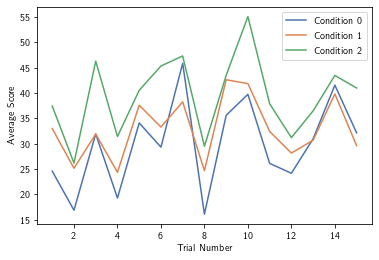

In [55]:
ctc = defaultdict(list)
for c,t in zip(conds, trial_scores):
    ctc[c].append(t)
for c in ctc.keys():
    ctc[c] = np.array(ctc[c])
plt.plot(range(1, 16), np.mean(ctc[0], axis = 0), label = 'Condition 0')
plt.plot(range(1, 16), np.mean(ctc[1], axis = 0), label = 'Condition 1')
plt.plot(range(1, 16), np.mean(ctc[2], axis = 0), label = 'Condition 2')
plt.xlabel("Trial Number")
plt.ylabel("Average Score")
plt.legend()
plt.savefig("results/condition_performances.png")

In [56]:
trial_scores = np.array(trial_scores)
print(np.mean(np.mean(trial_scores[:, :first_index], axis=1)))
print(np.mean(np.mean(trial_scores[:, first_index:], axis=1)))

32.30386178861789
36.555749128919864


In [57]:
for i in range(3):
    print(len(ctc[i]))

77
82
87


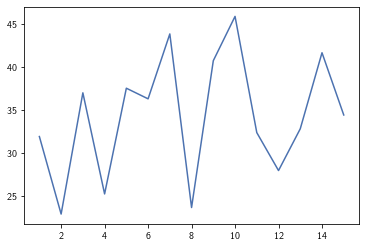

In [58]:
plt.plot(range(1, 16), np.mean(trial_scores, axis = 0), label = 'Condition 2')

In [59]:
print(ctc)

defaultdict(<class 'list'>, {2: array([[ 56,  64,   6, ...,  19,  97,  24],
       [ 54, -48,  92, ..., -13,  16,  63],
       [ 45,  27,  56, ...,  52,  37,  68],
       ...,
       [-30, 118,   0, ...,  22,  32,  45],
       [ 45,  69,  41, ...,  21,  33,  45],
       [ 26,  58,  14, ...,  48,  82,  93]]), 1: array([[ 51,  24,  55, ...,  53,  39,  64],
       [ 27, -33,  61, ...,  92,  46,  -6],
       [ 42,  -2,  42, ...,  67,  61,  73],
       ...,
       [-13, -33,  33, ..., -51,  -2,   7],
       [  4,  -9,  11, ...,  42,   5,  54],
       [ 33,  -1, -55, ...,  34,  53, -46]]), 0: array([[ 27,   0, 137, ...,  50,  16,  44],
       [ 45,  63, 115, ...,   7,  24,  17],
       [-24,  11, -19, ...,  51,  -5, -42],
       ...,
       [ 24,  30,  91, ...,  94,  54,  72],
       [ 19,  62,  27, ...,  17,  64,  63],
       [-34,  71, -14, ..., -45,   5,  41]])})


In [60]:
print(np.mean(ctc[0]))

29.87792207792208


In [61]:
print(datastrings[0]['questiondata'].keys())

dict_keys(['start_time', 'condition', 'theta_hat_condition', 'random_theta_condition', 'demo_bonus', 'final_bonus', 'end_time'])


In [62]:
from collections import defaultdict, Counter
t_bonus = defaultdict(int)
cond_nums = Counter(conds)
c_bonuses = defaultdict(list)
for b,c in zip(bonuses, conds):
    t_bonus[c] += b/cond_nums[c]
    c_bonuses[c].append(b)
print(t_bonus)
total_bonus = sum(list(t_bonus.values()))
c_bonuses = dict(c_bonuses)
print(c_bonuses)

defaultdict(<class 'int'>, {2: 1.9308045977011503, 1: 1.838048780487804, 0: 1.25012987012987})
{2: [2.52, 1.74, 2.16, 2.25, 1.99, 1.86, 2.59, 2.34, 2.23, 2.22, 2.31, 1.92, 1.96, 1.41, 1.56, 2.2, 1.37, 1.83, 1.92, 2.27, 2.36, 2.06, 1.52, 0.91, 2.88, 1.9, 1.7, 1.99, 2.3, 1.64, 1.4, 2.85, 0.88, 1.8, 1.25, 0.86, 1.91, 2.06, 2.73, 2.38, 2.22, 2.02, 1.83, 1.02, 2.3, 2.47, 2.84, 1.72, 1.34, 2.34, 2.01, 1.84, 1.78, 2.04, 1.92, 2.98, 0.5, 1.15, 1.3, 1.87, 1.38, 2.21, 2.83, 1.38, 0.59, 2.4, 2.87, 2.83, 1.4, 1.37, 2.35, 1.11, 2.29, 1.74, 0, 2.62, 2.78, 1.92, 1.96, 2.67, 2.33, 2.21, 0.04, 2.72, 2.02, 2.34, 2.1], 1: [2.19, 1.76, 1.59, 0.99, 1.9, 1.68, 2.15, 1.41, 2.99, 1.68, 2.14, 2.51, 2.72, 2.4, 0.96, 1.63, 1.04, 1.73, 2.24, 2.4, 1.43, 2.51, 1.59, 2.73, 2.48, 1.49, 1.52, 1.56, 2.21, 2.77, 1.89, 1.22, 0.62, 2.51, 0.5, 0.88, 1.29, 2.17, 1.79, 2.67, 2.59, 2.11, 0.91, 2.68, 1.31, 1.27, 2.7, 2.96, 2.02, 1.87, 1.95, 1.58, 1.83, 1.42, 1.3, 2.47, 1.37, 2.22, 2.17, 2.02, 2.03, 2.28, 2.01, 1.89, 1.48, 1.44

In [63]:
worker_ids = df.workerid.tolist()
worker_ids = [w for i, w in enumerate(worker_ids) if i not in excluded_indices]
for i, (w, p, b, c, s, e) in enumerate(zip(worker_ids, pid_survey_texts, bonuses, conds, starts, ends)):
    if not ast.literal_eval(p[1]['responses'])["Q0"] == "":
        print(w)
        print(p[1]['responses'])   #print(i, p[1]['responses'],  "|||||", b, "|||||", c, "|", s, "|", e, "\n")

A339YQ2DS0BS8R
{"Q0":"Thank you! I enjoyed this."}
AWRMHUCV3KAW9
{"Q0":"no issues"}
AP8QHC5BS3I6Z
{"Q0":"I enjoyed taking this survey. Thank you. "}
A34TVS5NMPO3O2
{"Q0":"no"}
A2CMUFRXU1OSEQ
{"Q0":"N/a, entertaining HIT!"}
A3VA8TXLVV8ESX
{"Q0":"fun experiment!"}
A19SHUK48VM4HI
{"Q0":"none"}
A15C96Z8TZEV6D
{"Q0":"very fun! thanks"}
A34WIUP7WCM3WB
{"Q0":"Fund game!"}
AGWL5NA0JSEWF
{"Q0":"This was very interesting and fun"}
AUSX67YB5MXQX
{"Q0":"That was fun."}
A2OPYRV3GLAPS1
{"Q0":"Thank you!"}
A3FXXVWB4808XQ
{"Q0":"none"}
A1JNNP9R3IF17Z
{"Q0":"thanks"}
A2ZWOPNOG2A5PX
{"Q0":"This was interesting; thanks!"}
A1OA4IW422FPKD
{"Q0":"fun"}
ABQFPYODMOD9U
{"Q0":"Thank you for this opportunity!"}
AKMQH2MGTUWO9
{"Q0":"It would have been better if you gave the conversion rate BEFORE the experiment. "}
A1F5E941TP0UIZ
{"Q0":"Thank you it was interesting "}
A2JK9URISOXMBQ
{"Q0":"Fantastic hit!  These are absolutely the best kind as they are highly entertaining and make one think.  Thanks very much for 

In [64]:
mean_rewards = defaultdict(list)
print(len(conds), len(trial_scores))
for c, test_r in zip(conds, trial_scores):
    mean_rewards[c].append(np.sum(test_r))
print(dict(mean_rewards))

246 246
{2: [757, 645, 613, 651, 545, 694, 784, 684, 841, 636, 674, 516, 535, 515, 574, 629, 496, 681, 716, 859, 694, 575, 357, 115, 900, 711, 630, 547, 671, 607, 510, 890, 103, 470, 450, 92, 714, 572, 842, 902, 838, 557, 480, 359, 669, 737, 886, 638, 486, 687, 552, 686, 463, 564, 519, 943, -65, 409, 468, 697, 502, 635, 882, 301, -16, 711, 899, 882, 510, 498, 690, 194, 664, 644, -83, 799, 862, 518, 535, 816, 681, 634, -33, 838, 558, 685, 788], 1: [627, 454, 385, 147, 508, 422, 808, 312, 947, 420, 605, 753, 837, 709, 135, 403, 166, 442, 645, 710, 322, 753, 387, 843, 741, 346, 359, 372, 633, 859, 505, 239, 198, 753, -123, 101, 267, 616, 467, 816, 784, 593, 113, 821, 274, 256, 829, 932, 558, 498, 528, 383, 480, 317, 271, 738, 298, 638, 616, 559, 561, 663, 553, 504, 343, 327, 586, 37, 731, 551, 511, 660, 103, 664, 612, 914, 562, 447, 409, -82, 296, 123], 0: [715, 498, -13, 666, 313, 118, 815, 383, 183, 591, 814, 634, 374, 831, 384, 853, -133, 141, 240, 749, 682, 354, 144, 630, 337, 196, 25

In [65]:
from scipy.stats import ttest_ind
t, p = ttest_ind(mean_rewards[1], mean_rewards[2])
print(t, p)

-2.7462061861888922 0.006690074943724718


In [66]:
for i in range(3):
    print(f"Condition {i}")
    print("Mean", np.mean(mean_rewards[i]))
    print("STD:",np.round(np.std(mean_rewards[i]), 2), "SE:", np.round(np.std(mean_rewards[i])/np.sqrt(15), 2))

Condition 0
Mean 448.16883116883116
STD: 264.27 SE: 68.23
Condition 1
Mean 493.2926829268293
STD: 240.99 SE: 62.22
Condition 2
Mean 592.6896551724138
STD: 226.74 SE: 58.54


In [67]:
np.std(mean_rewards[0] + mean_rewards[2])

255.47082973759913

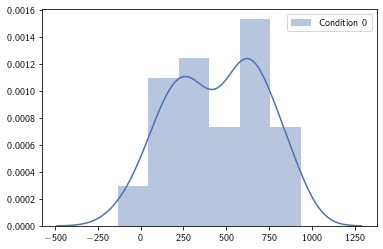

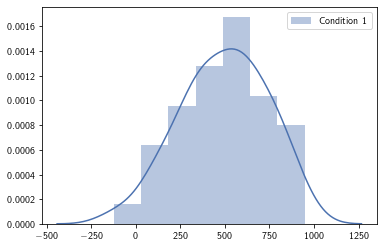

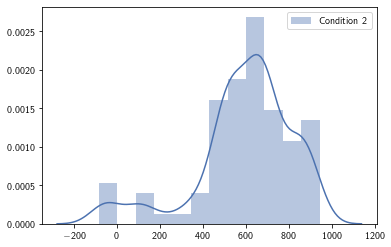

In [68]:
for i in range(3):
    plt.figure()
    sns.distplot(mean_rewards[i], label = f'Condition {i}')
    plt.legend()
    plt.savefig(f"results/condition_figs_{i}.png")

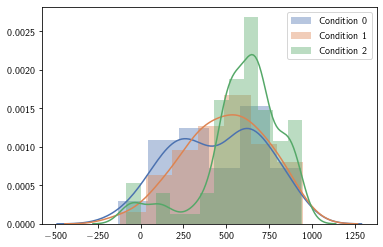

In [69]:
ax = sns.distplot(mean_rewards[0], label = f'Condition 0')
sns.distplot(mean_rewards[1], ax=ax, label = 'Condition 1')
sns.distplot(mean_rewards[2], ax=ax, label = 'Condition 2')
plt.legend()
plt.savefig("results/condition_figs.png")

In [70]:
from scipy.stats import ttest_ind

for i in range(3):
    for j in range(i+1, 3):
        print(f"t-test between condition {i} and condition {j}")
        t, p = ttest_ind(mean_rewards[i], mean_rewards[j])
        print("t =", np.round(t, 3), "p = ", np.round(p, 3))
        print(f"Cohen's d={np.round(cohend(mean_rewards[i], mean_rewards[j]), 3)}")

t-test between condition 0 and condition 1
t = -1.119 p =  0.265
Cohen's d=-0.178
t-test between condition 0 and condition 2
t = -3.746 p =  0.0
Cohen's d=-0.587
t-test between condition 1 and condition 2
t = -2.746 p =  0.007
Cohen's d=-0.425


In [71]:
i=7
df = pd.read_csv(f"experiment_data/rsd_{data_terms[i]}_trials.csv")
df = df[df.hitid == hitid]
df = df[df.status == 5]

In [72]:
datastrings = df.datastring.tolist()
datastrings = [json.loads(d) for d in datastrings]

In [73]:
from collections import defaultdict
trial_scores = []
pid_survey_texts = []
participant_data = defaultdict(lambda : defaultdict())
pid_trial_actions = []
pid_envs = []
pid_demo_correct = []
pid_thetas = []
pid_theta_hats = []
for i, d in enumerate(datastrings):
    stimulus_count = 0
    if i not in excluded_indices:
        scores = []
        survey_texts = []
        trials_actions = []
        envs = []
        participant_data[i]['bonus'] = d['questiondata']['final_bonus']
        participant_data[i]['start_time'] = d['questiondata']['start_time']
        participant_data[i]['end_time'] = d['questiondata']['end_time']
        participant_data[i]['condition'] = d['questiondata']['condition']
        pid_thetas.append(d['questiondata']['random_theta_condition'])
        pid_theta_hats.append(d['questiondata']['theta_hat_condition'])
        condition = d['questiondata']['condition']
        if condition == 0:
            pid_demo_correct.append(0)
        dat = d["data"]
        for k in dat:
            z = k["trialdata"]
            if "stimulus" in z and "correct" in z:
                if z["correct"][0]:
                    pid_demo_correct.append(1)
                else:
                    pid_demo_correct.append(0)
            if "block" in z:
                if z["block"] == "demo_main2":
                    stimulus_count += 1
            if z['trial_type'] == 'survey-text':
                survey_texts.append(z)
            if "block" in z:
                if z["block"] == "test_main":
                    actions = [int(q) for q in z["queries"]["click"]["state"]["target"]] + [0]
                    envs.append([0] + [int(e) for e in z["stateRewards"][1:]])
                    s = z['score']
#                     if len(actions) == 1:
#                         s = 0
                    scores.append(s)
                    trials_actions.append(actions)
            #print(k['trialdata'])
        #print(conds[i], stimulus_count)
        pid_trial_actions.append(trials_actions)
        pid_envs.append(envs)
        participant_data[i]['scores'] = scores
        participant_data[i]['survey_texts'] = survey_texts
        trial_scores.append(scores)
        pid_survey_texts.append(survey_texts)

In [74]:
bonuses = [d['questiondata']['final_bonus'] for i, d in enumerate(datastrings) if i not in excluded_indices]
conds = [d['questiondata']['condition'] for i, d in enumerate(datastrings) if i not in excluded_indices]
starts = [d['questiondata']['start_time'] for i, d in enumerate(datastrings) if i not in excluded_indices]
ends = [d['questiondata']['end_time'] for i, d in enumerate(datastrings) if i not in excluded_indices]

In [75]:
print(len(datastrings))
for d in datastrings:
    print(d['questiondata'])

300
{'start_time': 'Sat Feb 01 2020 19:30:12 GMT-0500 (Eastern Standard Time)', 'condition': 2, 'theta_hat_condition': 4, 'random_theta_condition': 0, 'demo_bonus': 0.5, 'final_bonus': 2.52, 'end_time': 'Sat Feb 01 2020 19:43:29 GMT-0500 (Eastern Standard Time)'}
{'start_time': 'Sat Feb 01 2020 19:31:36 GMT-0500 (Eastern Standard Time)', 'condition': 1, 'theta_hat_condition': 2, 'random_theta_condition': 1, 'demo_bonus': 0.5, 'final_bonus': 2.19, 'end_time': 'Sat Feb 01 2020 19:47:30 GMT-0500 (Eastern Standard Time)'}
{'start_time': 'Sat Feb 01 2020 17:31:41 GMT-0700 (Mountain Standard Time)', 'condition': 2, 'theta_hat_condition': 3, 'random_theta_condition': 2, 'demo_bonus': 0, 'final_bonus': 1.74, 'end_time': 'Sat Feb 01 2020 17:48:34 GMT-0700 (Mountain Standard Time)'}
{'start_time': 'Sat Feb 01 2020 17:29:35 GMT-0700 (Mountain Standard Time)', 'condition': 1, 'theta_hat_condition': 5, 'random_theta_condition': 0, 'demo_bonus': 0.5, 'final_bonus': 1.76, 'end_time': 'Sat Feb 01 2020

In [76]:
from dateutil import parser
starts = [parser.parse(ast.literal_eval(s)) for s in starts]

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
(print(np.mean(bonuses)))

In [ ]:
### Demographics
import ast
age_data = []
gender_data = []
for i, p in enumerate(pid_survey_texts):
    print(p[0])
    resp = ast.literal_eval(p[0]["responses"])
    #print(i, ast.literal_eval(p[1]["responses"])["Q0"])
    print(i, conds[i], "-------", pid_trial_actions[i], "\n")
    if resp["Q1"] != "":
        age_data.append(int(resp["Q1"]))
    if resp["Q2"] != "":
        gender_data.append(resp["Q2"].lower())
plt.title("Age")
sns.distplot(age_data)
plt.savefig("results/p_age.png")
plt.figure()
plt.title("Gender")
plt.hist(gender_data)

In [ ]:
print(np.mean(age_data))

In [ ]:
print(Counter(gender_data))

In [ ]:
d = "experiment_data/simulations"